In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# Preprocessing

In [3]:
df = pd.read_csv("Clean_Dataset.csv")

In [4]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [5]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [6]:
# drop Unnamed: 0 column
# drop flight or consider if the prefix can make a difference 
# one hot encoding on some features - arrival_time, airline, source_city, departure_time, destination_city
# represent class as 0,1
# represent stops into 0, 1, 2...

In [7]:
df = df.drop(['Unnamed: 0', 'flight'], axis=1)
df = df.join(pd.get_dummies(df.airline, prefix="airline_", dtype=int)).drop(['airline'], axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix="source_city_", dtype=int)).drop(['source_city'], axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix="departure_time_", dtype=int)).drop(['departure_time'], axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix="destination_city_", dtype=int)).drop(['destination_city'], axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix="arrival_time_", dtype=int)).drop(['arrival_time'], axis=1)

In [8]:
df['class'] = df['class'].factorize()[0]
df.stops = df.stops.factorize()[0]

In [9]:
df

,stops,class,duration,days_left,price,airline__AirAsia,airline__Air_India,airline__GO_FIRST,airline__Indigo,airline__SpiceJet,...,destination_city__Delhi,destination_city__Hyderabad,destination_city__Kolkata,destination_city__Mumbai,arrival_time__Afternoon,arrival_time__Early_Morning,arrival_time__Evening,arrival_time__Late_Night,arrival_time__Morning,arrival_time__Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300151,1,1,10.00,49,81585,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [10]:
# plt.figure(figsize=(15,8))
# sb.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [11]:
# Training LinearRegression model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Split column into X and y which is data and value to be predicted 
X = df.drop(['price'], axis=1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = LinearRegression()

In [12]:
reg.fit(X_train, y_train)

LinearRegression()

In [13]:
reg.score(X_test, y_test)

0.9111814740597419

In [14]:
# Training RamdomForestRegressor model

from sklearn.ensemble import RandomForestRegressor

rf_reg =  RandomForestRegressor(n_jobs=-1)

rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [15]:
rf_reg.score(X_test, y_test)

0.9856211397940885

In [18]:
# Evaluting model

import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = rf_reg.predict(X_test)

print('R2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', math.sqrt(mse))

R2:  0.9856211397940885
MAE:  1060.2448156642217
MSE:  7388029.80427544
RMSE:  2718.093045551502


Text(0.5, 1.0, 'Prediction Vs Actual')

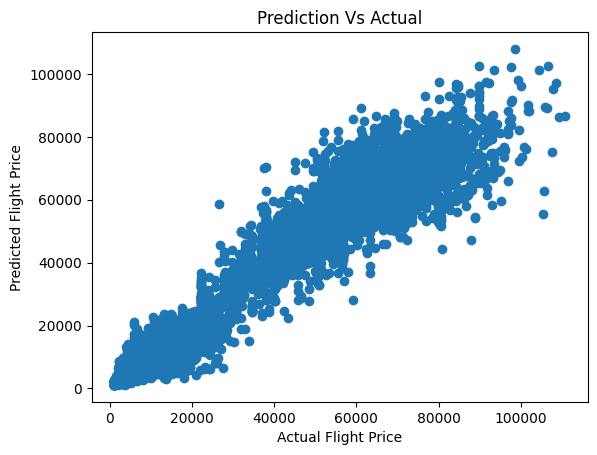

In [19]:
# Visualizing evaluation with scatterplot

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction Vs Actual')

In [20]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64